In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Data Collection

In [2]:
# reading a csv file using pandas library
cal=pd.read_csv("C:/Users/manth/Assignment/Simple linear/calories_consumed.csv")
cal.head()

,Weight,CC
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


# Exploratory Data Analysis (EDA)

In [3]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
Weight    14 non-null int64
CC        14 non-null int64
dtypes: int64(2)
memory usage: 352.0 bytes


In [4]:
print(cal.isnull().sum())      #checking for null value

Weight    0
CC        0
dtype: int64


In [5]:
cal.describe() 

,Weight,CC
count,14.000000,14.000000
mean,357.714286,2340.714286
std,333.692495,752.109488
min,62.000000,1400.000000
25%,114.500000,1727.500000
50%,200.000000,2250.000000
75%,537.500000,2775.000000
max,1100.000000,3900.000000


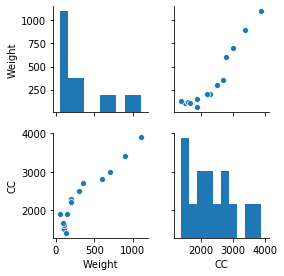

In [6]:
import seaborn as sns
sns.pairplot(cal,height= 2)

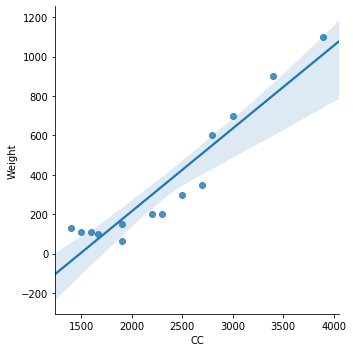

In [7]:
sns.lmplot(x = 'CC', y='Weight',data=cal)

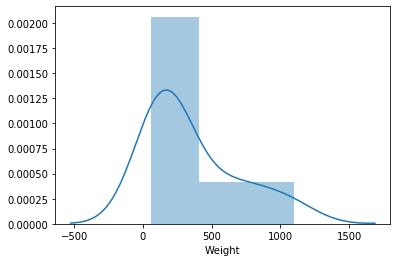

In [8]:
sns.distplot(cal['Weight'])

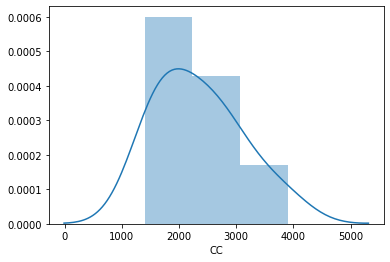

In [9]:
sns.distplot(cal['CC'])

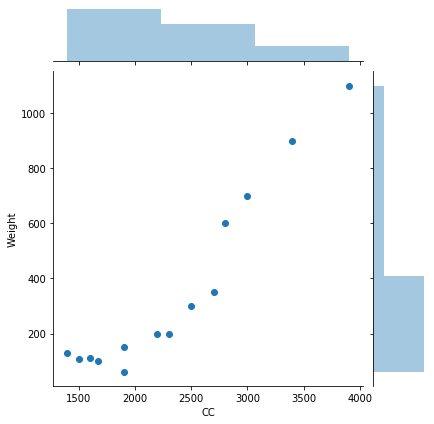

In [10]:
sns.jointplot(data = cal, x = 'CC', y='Weight')

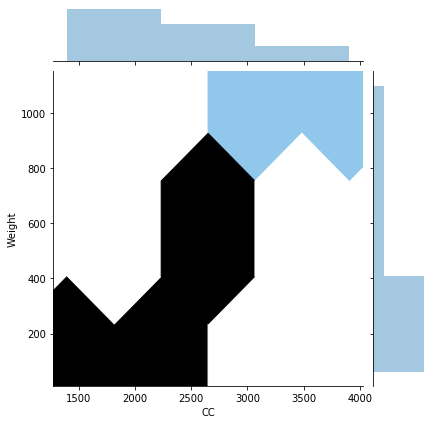

In [11]:
sns.jointplot(x = 'CC', y='Weight', kind='hex',data=cal)

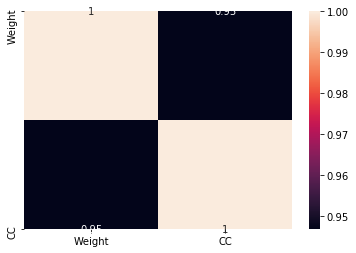

In [12]:
sns.heatmap(cal.corr(),annot=True)

In [13]:
cal.corr()

,Weight,CC
Weight,1.000000,0.946991
CC,0.946991,1.000000


# Linear Regression Model

In [14]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model1 = smf.ols("Weight~CC",data=cal).fit()

# For getting coefficients of the varibles used in equation
model1.params

Intercept   -625.752356
CC             0.420157
dtype: float64

In [15]:
# P-values for the variables and R-squared value for prepared model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           2.86e-07
Time:                        18:48:08   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.0

C:\Users\manth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [16]:
model1.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,-845.426655,-406.078057
CC,0.330506,0.509807


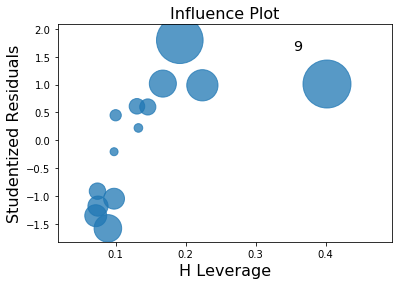

In [17]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)
plt.show()

In [18]:
# Predictions from the Model 
pred = model1.predict(cal.iloc[:,1])
pred.head()

0      4.482599
1    340.607908
2    802.780209
3    298.592245
4    424.639236
dtype: float64

In [19]:
np.sqrt(np.mean((pred-cal.Weight)**2))

103.30250194726935

In [20]:
pred.corr(cal.Weight)

0.9469910088554455

Text(0, 0.5, 'Weight')

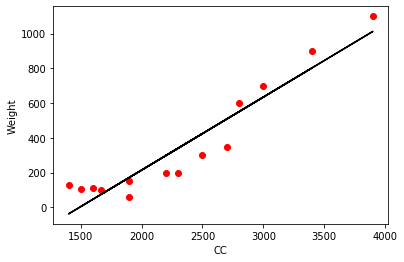

In [21]:
plt.scatter(x=cal['CC'],y=cal['Weight'],color='red');plt.plot(cal['CC'],pred,color='black');
plt.xlabel('CC');plt.ylabel('Weight')

Text(0, 0.5, 'Predicted')

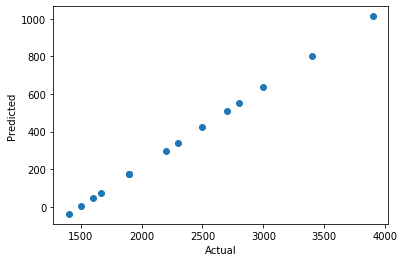

In [22]:
plt.scatter(x=cal.CC, y=pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [23]:
# Quadratic model
cal["CC_square"]=cal.CC*cal.CC
print(cal.head())

   Weight    CC  CC_square
0     108  1500    2250000
1     200  2300    5290000
2     900  3400   11560000
3     200  2200    4840000
4     300  2500    6250000


In [24]:
model_quad=smf.ols("Weight~CC+CC_square",data=cal).fit()
model_quad.params

Intercept    203.258458
CC            -0.291894
CC_square      0.000140
dtype: float64

In [25]:
print(model_quad.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.2
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           5.55e-08
Time:                        18:48:14   Log-Likelihood:                -79.425
No. Observations:                  14   AIC:                             164.9
Df Residuals:                      11   BIC:                             166.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    203.2585    243.624      0.834      0.4

In [26]:
model_quad.conf_int(0.05)

,0,1
Intercept,-332.955294,739.472210
CC,-0.736713,0.152925
CC_square,0.000053,0.000226


In [27]:
pred_quad=model_quad.predict(cal.iloc[:,:3])
pred_quad.head()

0     79.333455
1    269.953635
2    823.649454
3    236.359838
4    345.512323
dtype: float64

In [28]:
#rmse for quadratic model
rmse_quad=np.sqrt(np.mean((pred_quad-cal.Weight)**2))
rmse_quad

70.4075152983156

Text(0, 0.5, 'Predicted')

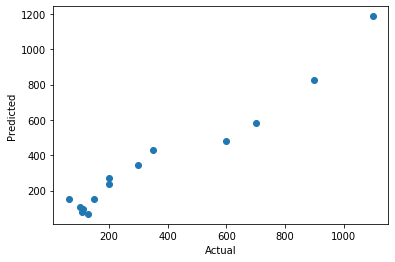

In [29]:
plt.scatter(x=cal.Weight, y=pred_quad)
plt.xlabel("Actual")
plt.ylabel("Predicted")